In [151]:
# Importing Various Libraries 

import pandas as pd
import numpy as np
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
# Importing Spending Data Set

SpendingData = pd.read_excel("Spending.xlsx")

In [153]:
SpendingData

,Details,Posting Date,Amount,Balance
0,DEBIT,2023-11-10,-36.20,580.44
1,DEBIT,2023-11-10,-150.00,616.64
2,DEBIT,2023-11-10,-100.00,766.64
3,DEBIT,2023-11-10,-30.00,866.64
4,DEBIT,2023-11-10,-600.00,896.64
...,...,...,...,...
970,CREDIT,2023-04-20,32.75,299.23
971,CREDIT,2023-04-20,100.00,266.48
972,CREDIT,2023-04-19,150.65,166.48
973,CREDIT,2023-04-19,3.24,15.83


In [154]:
# Converting 'Posting Date' column into Datetime and renaming as 'Date', then dropping 'Posting Date' from data frame

SpendingData['Date'] = pd.to_datetime(SpendingData['Posting Date'])
SpendingData.drop(['Posting Date'], axis=1, inplace=True)
SpendingData = SpendingData.sort_values(by='Date', ascending=True)

In [155]:
# Splitting dataset into Credits (income) and Debits (spending)

Credit = SpendingData[SpendingData['Details'] == 'CREDIT']
Debit = SpendingData[SpendingData['Details'] == 'DEBIT']

In [156]:
Credit.head()

,Details,Amount,Balance,Date
974,CREDIT,12.59,12.59,2023-04-19
973,CREDIT,3.24,15.83,2023-04-19
972,CREDIT,150.65,166.48,2023-04-19
971,CREDIT,100.00,266.48,2023-04-20
970,CREDIT,32.75,299.23,2023-04-20


In [157]:
Debit.head()

,Details,Amount,Balance,Date
969,DEBIT,-21.00,278.23,2023-04-20
968,DEBIT,-1.00,277.23,2023-04-21
966,DEBIT,-115.52,125.70,2023-04-24
959,DEBIT,-24.28,6.07,2023-04-24
960,DEBIT,-7.99,30.35,2023-04-24


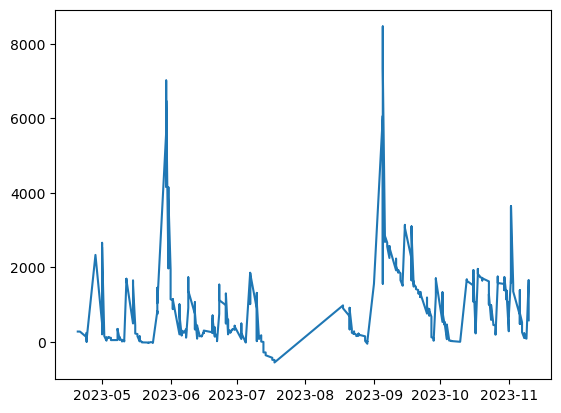

In [158]:
# Plotting Debits from dataset

plt.plot(Debit['Date'], Debit['Balance'])

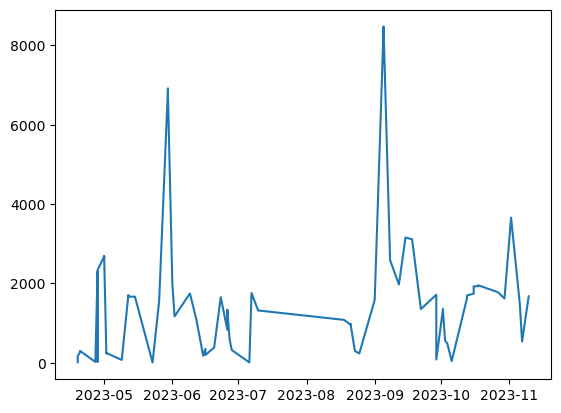

In [159]:
# Plotting Credits from dataset

plt.plot(Credit['Date'], Credit['Balance'])

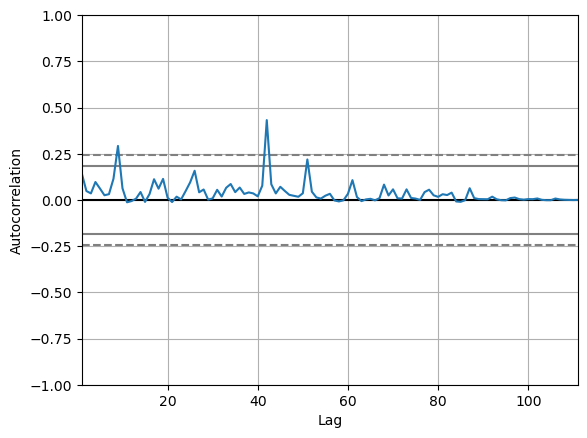

In [160]:
# Autocorrelation grapgh for Debits

DebitData = Debit.groupby('Date').sum('Amount')
autocorrelation_plot(DebitData)
plt.show()

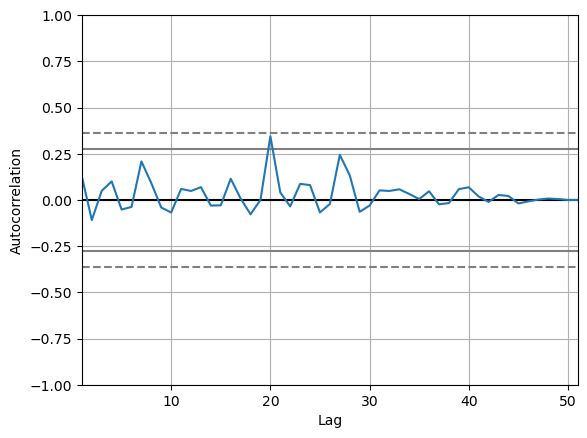

In [161]:
# Autocorrelation graph for Credits

CreditData = Credit.groupby('Date').sum('Amount')
autocorrelation_plot(CreditData)
plt.show()

In [162]:
# Creation of ARIMA models for Debits and Credits

Spending = ARIMA(DebitData.Amount, order=(3,1,0))
SpendingFit = Spending.fit()

Income = ARIMA(CreditData.Amount, order=(3,1,0))
IncomeFit = Income.fit()

In [163]:
print(SpendingFit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                  111
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -891.255
Date:                Mon, 13 Nov 2023   AIC                           1790.510
Time:                        19:09:57   BIC                           1801.312
Sample:                             0   HQIC                          1794.892
                                - 111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6103      0.052    -11.657      0.000      -0.713      -0.508
ar.L2         -0.3947      0.090     -4.403      0.000      -0.570      -0.219
ar.L3         -0.2118      0.087     -2.423      0.0

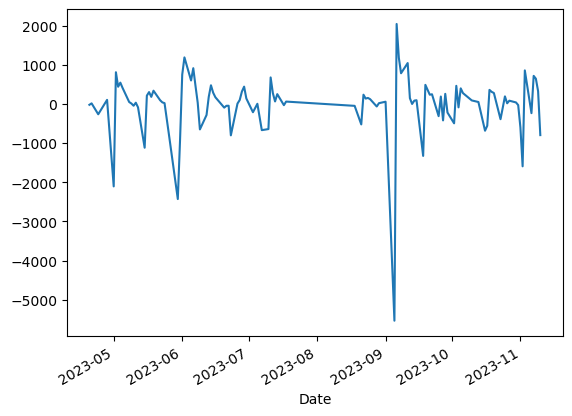

In [164]:
residuals = SpendingFit.resid
residuals.plot()
plt.show()

In [165]:
print(IncomeFit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                   51
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -440.466
Date:                Mon, 13 Nov 2023   AIC                            888.931
Time:                        19:09:58   BIC                            896.580
Sample:                             0   HQIC                           891.844
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7475      0.139     -5.381      0.000      -1.020      -0.475
ar.L2         -0.6083      0.170     -3.585      0.000      -0.941      -0.276
ar.L3         -0.2190      0.137     -1.594      0.1

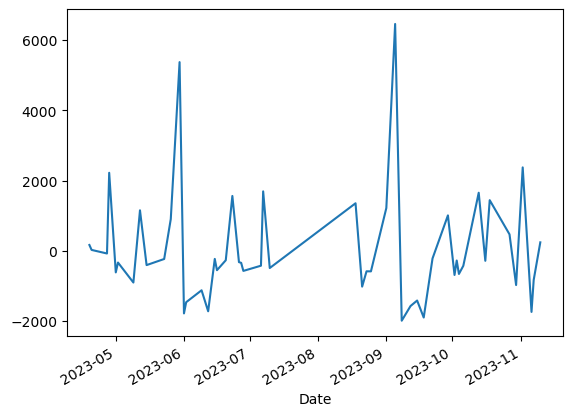

In [166]:
residuals = IncomeFit.resid
residuals.plot()
plt.show()